# Dual Phosphorylation Cycle

In [1]:
from ecell4_base.core import *
from ecell4.util import species_attributes, reaction_rules, show

In [2]:
@species_attributes
def attrgen(radius, D):
    K | Kp | Kpp | KK | PP | K_KK | Kp_KK | Kpp_PP | Kp_PP | {"radius": radius, "D": D}

@reaction_rules
def rulegen(kon1, koff1, kcat1, kon2, koff2, kcat2):
    (K + KK == K_KK | (kon1, koff1)
        > Kp + KK | kcat1
        == Kp_KK | (kon2, koff2)
        > Kpp + KK | kcat2)

    (Kpp + PP == Kpp_PP | (kon1, koff1)
        > Kp + PP | kcat1
        == Kp_PP | (kon2, koff2)
        > K + PP | kcat2)

In [3]:
m = NetworkModel()

In [4]:
for i, sp in enumerate(attrgen(0.0025, 1.0)):
    print(i, sp.serial(), sp.get_attribute("radius").magnitude, sp.get_attribute("D").magnitude)
    m.add_species_attribute(sp)

0 K 0.0025 1.0
1 Kp 0.0025 1.0
2 Kpp 0.0025 1.0
3 KK 0.0025 1.0
4 PP 0.0025 1.0
5 K_KK 0.0025 1.0
6 Kp_KK 0.0025 1.0
7 Kpp_PP 0.0025 1.0
8 Kp_PP 0.0025 1.0


In [5]:
ka1, kd1, kcat1 = 0.04483455086786913, 1.35, 1.5
ka2, kd2, kcat2 = 0.09299017957780264, 1.73, 15.0

for i, rr in enumerate(rulegen(ka1, kd2, kcat1, ka2, kd2, kcat2)):
    reactants, products, k = rr.reactants(), rr.products(), rr.k()
    print(i, rr.as_string())
    m.add_reaction_rule(rr)

0 K+KK>K_KK|0.0448346
1 K_KK>K+KK|1.73
2 K_KK>Kp+KK|1.5
3 Kp+KK>Kp_KK|0.0929902
4 Kp_KK>Kp+KK|1.73
5 Kp_KK>Kpp+KK|15
6 Kpp+PP>Kpp_PP|0.0448346
7 Kpp_PP>Kpp+PP|1.73
8 Kpp_PP>Kp+PP|1.5
9 Kp+PP>Kp_PP|0.0929902
10 Kp_PP>Kp+PP|1.73
11 Kp_PP>K+PP|15


In [6]:
show(m)

K|{'radius': <ecell4_base.core.Quantity object at 0x150173e96748>, 'D': <ecell4_base.core.Quantity object at 0x150173e96588>}
Kp|{'D': <ecell4_base.core.Quantity object at 0x150173e96588>, 'radius': <ecell4_base.core.Quantity object at 0x150173e96e80>}
Kpp|{'radius': <ecell4_base.core.Quantity object at 0x150173e96748>, 'D': <ecell4_base.core.Quantity object at 0x150173e96588>}
KK|{'radius': <ecell4_base.core.Quantity object at 0x150173e96748>, 'D': <ecell4_base.core.Quantity object at 0x150173e96e80>}
PP|{'D': <ecell4_base.core.Quantity object at 0x150173e96e80>, 'radius': <ecell4_base.core.Quantity object at 0x150173e96588>}
K_KK|{'D': <ecell4_base.core.Quantity object at 0x150173e96588>, 'radius': <ecell4_base.core.Quantity object at 0x150173e96e80>}
Kp_KK|{'D': <ecell4_base.core.Quantity object at 0x150173e96e80>, 'radius': <ecell4_base.core.Quantity object at 0x150173e96588>}
Kpp_PP|{'D': <ecell4_base.core.Quantity object at 0x150173e96588>, 'radius': <ecell4_base.core.Quantity ob

In [7]:
from ecell4_base import gillespie, ode

f = gillespie.Factory()
# f = ode.Factory()

w = f.world(ones())
# w.bind_to(m)
w.add_molecules(Species("K"), 120)
w.add_molecules(Species("KK"), 30)
w.add_molecules(Species("PP"), 30)

sim = f.simulator(w, m)

In [8]:
obs = FixedIntervalNumberObserver(1.0, ["K", "K_KK", "Kp", "Kp_KK", "Kp_PP", "Kpp", "Kpp_PP"])
sim.run(60, [obs])

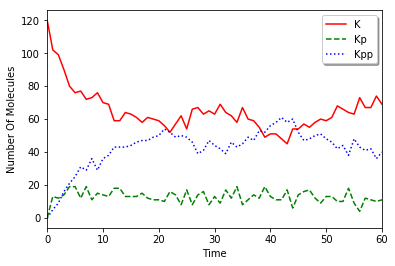

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
from numpy import array

data = array(obs.data()).T
plt.plot(data[0], data[1] + data[2], "r-", label="K")
plt.plot(data[0], data[3] + data[4] + data[5], "g--", label="Kp")
plt.plot(data[0], data[6] + data[7], "b:", label="Kpp")
plt.xlabel("Time")
plt.ylabel("Number Of Molecules")
plt.xlim(data[0][0], data[0][-1])
plt.legend(loc="best", shadow=True)
plt.show()